In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

C:\Users\nicol\miniconda3\envs\GPU\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
X_train = pd.read_csv("../data/X_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_train = pd.read_csv("../data/y_train.csv")
y_test = pd.read_csv("../data/y_test.csv")

X_train = X_train.text 
X_test = X_test.text
y_train = y_train.Dominance.astype('category')
y_test = y_test.Dominance.astype('category')

# Naive Bayes

In [3]:
count_vect = CountVectorizer()
count_vect.fit(X_train)

X_train_counts = count_vect.transform(X_train)
X_test_counts = count_vect.transform(X_test)

## Unbalanced Classes

In [4]:
nb = MultinomialNB()
nb.fit(X_train_counts, y_train)

y_pred = nb.predict(X_test_counts)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

results = pd.DataFrame({'Dominance':y_test.cat.categories,
                       'Precision':p,
                       'Recall':r, 
                       'F1': f, 
                       "Support": s})

macro_scores = results.loc[:, ["Precision", "Recall", "F1"]].agg('mean')

C:\Users\nicol\miniconda3\envs\GPU\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
display(results)
display(macro_scores)
print("Overall Accuracy: ", acc)

,Dominance,Precision,Recall,F1,Support
0,Agriculture,0.000000,0.000000,0.000000,33
1,City/Town Character,0.556277,0.664083,0.605418,387
2,Economy and Employment,0.694444,0.189394,0.297619,132
3,Education,0.000000,0.000000,0.000000,45
4,Environment and Resources,0.681034,0.387255,0.493750,204
5,Govenment,0.475584,0.702194,0.567089,319
6,Growth and Development,0.460490,0.810552,0.587315,417
7,Health and Healthcare,1.000000,0.240000,0.387097,50
8,Housing,0.616438,0.414747,0.495868,217
9,Local Opportunities,0.639640,0.387978,0.482993,183


Precision    0.633086
Recall       0.394581
F1           0.423244
dtype: float64

Overall Accuracy:  0.5450056969236612


Text(98.2222222222222, 0.5, 'predicted label')

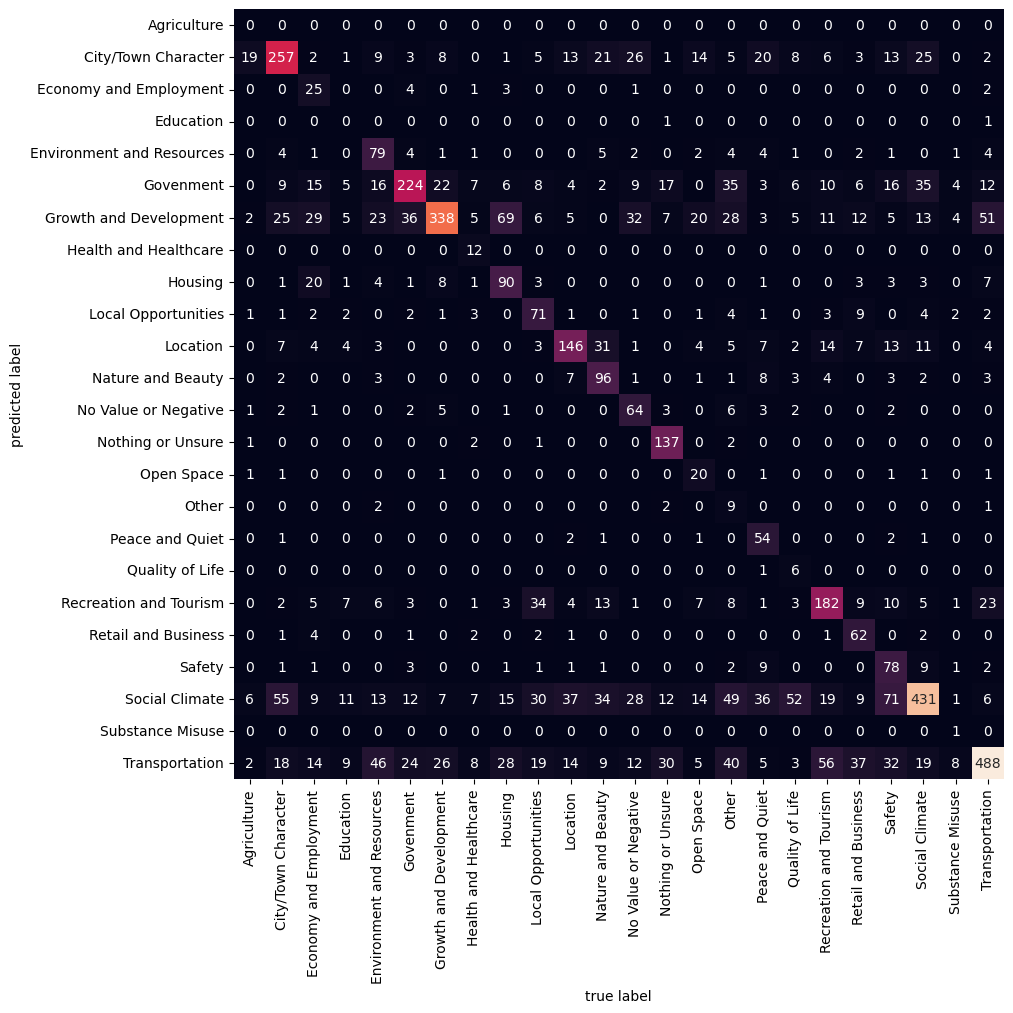

In [6]:
plt.figure(figsize=(10, 10))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test.cat.categories, yticklabels=y_test.cat.categories)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Upsampling

In [7]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X_train_counts, y_train)

In [8]:
nb = MultinomialNB()
nb.fit(X_res, y_res)

y_pred = nb.predict(X_test_counts)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

results = pd.DataFrame({'Dominance':y_test.cat.categories,
                       'Precision':p,
                       'Recall':r, 
                       'F1': f, 
                       "Support": s})

macro_scores = results.loc[:, ["Precision", "Recall", "F1"]].agg('mean')

In [9]:
display(results)
display(macro_scores)
print("Overall Accuracy: ", acc)

,Dominance,Precision,Recall,F1,Support
0,Agriculture,0.309524,0.393939,0.346667,33
1,City/Town Character,0.649596,0.622739,0.635884,387
2,Economy and Employment,0.616162,0.462121,0.528139,132
3,Education,0.607143,0.377778,0.465753,45
4,Environment and Resources,0.611111,0.539216,0.572917,204
5,Govenment,0.478170,0.721003,0.575000,319
6,Growth and Development,0.535587,0.721823,0.614913,417
7,Health and Healthcare,0.763158,0.580000,0.659091,50
8,Housing,0.563319,0.594470,0.578475,217
9,Local Opportunities,0.552885,0.628415,0.588235,183


Precision    0.596140
Recall       0.546101
F1           0.558810
dtype: float64

Overall Accuracy:  0.59684770224079


Text(98.2222222222222, 0.5, 'predicted label')

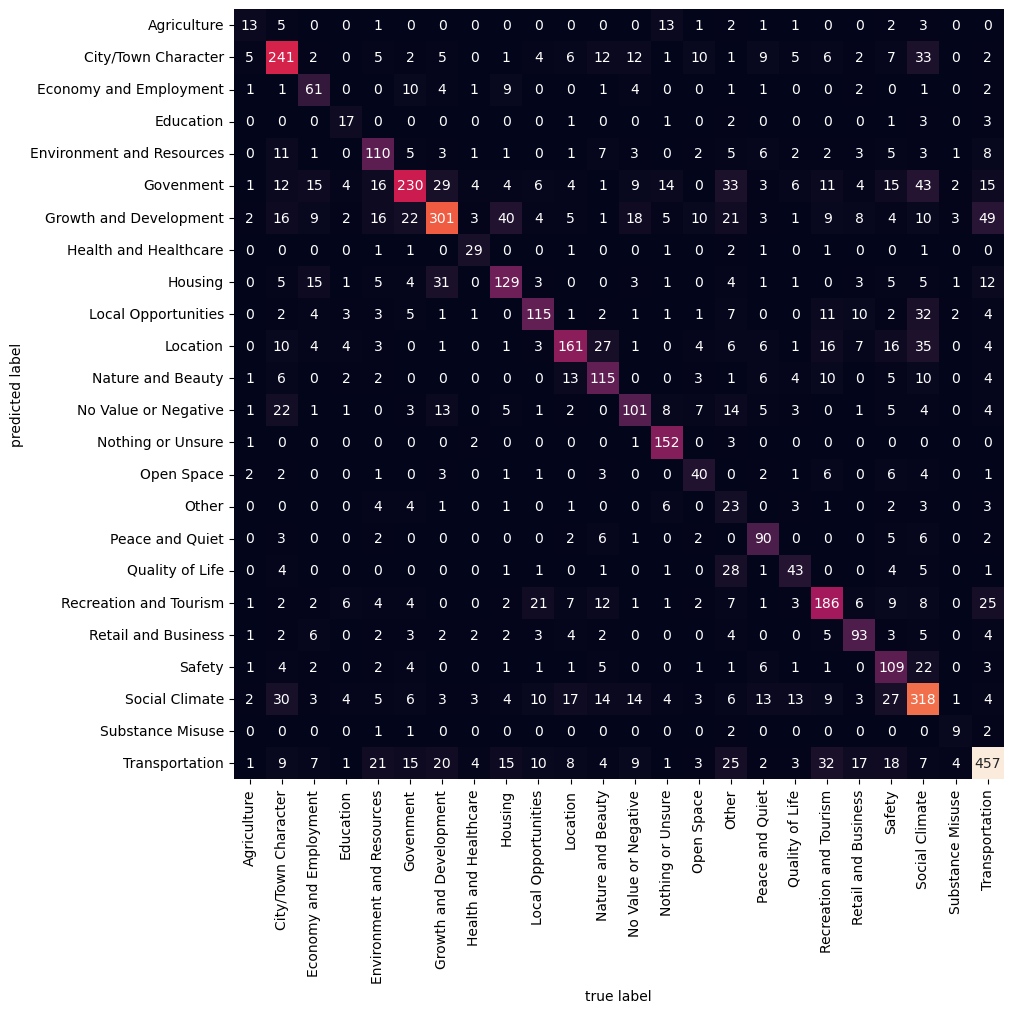

In [10]:
plt.figure(figsize=(10, 10))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test.cat.categories, yticklabels=y_test.cat.categories)
plt.xlabel('true label')
plt.ylabel('predicted label')